## Бобровских Глеб, БПМ151

In [1]:
import numpy as np
import numpy.linalg as lnl
import matplotlib.pyplot as plt
%matplotlib inline

## Gaussian Elimination.
### Задание 1.
1. Задать матрицу системы $\large A$ и вектор правой части $\large \vec{b}$.<br> 
   a) Составить программу, реализующую **метод Гаусса**
   (схема частичного выбора) для произвольной системы $\large A\vec{x}=\vec{b}$. <br> 
   б)  Используя составленную программу, найти
   решение заданной системы. Используя встроенную функцию , найти решение x системы $\large A\vec{x}=\vec{b}$ с помощью
   метода Гаусса.

In [2]:
def var_coeff(var_num, i, j):
    c =  0.1 * var_num * i * j
    return 55 / (c**2  + 3*c  + 100)

In [3]:
var_num = 4#int(input())
n = 7#int(input())

A = np.asarray([[var_coeff(var_num, i, j) for i in range(1, n+1)] for j in range(1, n + 1)])
b = np.full((n, 1), float(var_num))

In [23]:
def draw_matrix(a, ax):
    
    res = ax.imshow(np.array(a), cmap=plt.cm.Pastel1_r, 
                    interpolation='nearest')

    width, height = a.shape

    for x in range(width):
        for y in range(height):
            ax.annotate(str(a[x, y])[:5], xy=(y, x), 
                        horizontalalignment='center',
                        verticalalignment='center')

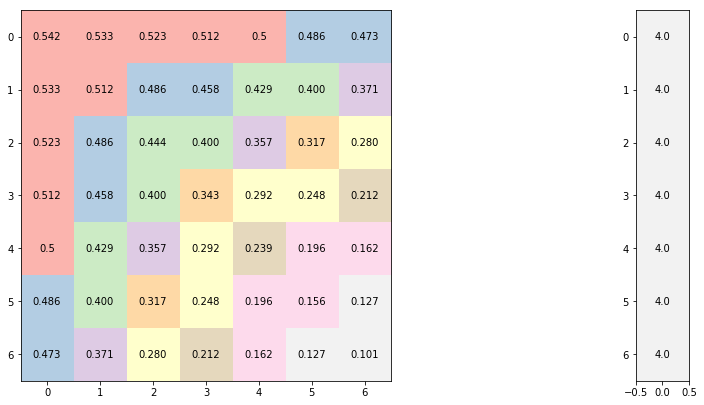

In [40]:
fig = plt.figure(figsize=(15, 15))

#show matrix A
ax = fig.add_subplot(221)

draw_matrix(A, ax)
# show b vector      
ax = fig.add_subplot(222)

draw_matrix(b, ax)

Определим функцию ```GaussEl``` и найдем решение системы уравнений $A\vec{x}=\vec{b}$.

In [6]:
def GaussEl(A, b):
    n = A.shape[0]
    Ab = np.hstack((A, b))
    #forward pass
    for k in range(n - 1):
        # find k-th pivot
        pivot = np.argmax(abs(Ab[k:, k])) + k
        if Ab[pivot, k] == 0:
            print('Matrix is singular!')
            return -1
        # swap rows
        Ab[[pivot, k], :] = Ab[[k, pivot], :]
        mu = Ab[k + 1:, k] / Ab[k, k]
        Ab[k + 1:, :] -= Ab[k, :] * mu[:, np.newaxis]
        
    #backward pass
    x = np.zeros((n, 1))
    x[-1] = Ab[-1, -1] / Ab[-1, -2]
    for k in range(n-2, -1, -1):
        x[k] = (Ab[k, -1] - np.dot(Ab[k, k + 1:n], x[k+1:])) / Ab[k, k]
        
    return x

In [7]:
x_ = GaussEl(A, b)
x_

array([[ 21.42617103],
       [-36.01188314],
       [ 49.15018933],
       [-49.51391554],
       [ 32.05364783],
       [-11.09060325],
       [  1.26654193]])

Теперь найдем решение исходной системы, пользуясь всптроенным методом поиска решений СЛАУ: ``` numpy.linalg.solve ``` <br>
[Описание метода](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.solve.html)

In [8]:
x_np = lnl.solve(A, b)
x_np

array([[ 21.42617103],
       [-36.01188314],
       [ 49.15018933],
       [-49.51391555],
       [ 32.05364783],
       [-11.09060325],
       [  1.26654193]])

Найдем число обусловленности матрицы $A$ с помощью функции: ``` numpy.linalg.cond ``` <br>
[Описание метода](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.cond.html)

In [9]:
lnl.cond(A)

4333277.0629264051

### Задание 2.
Принимая решение $x$, полученное в п. 1, за точное, вычислить вектор $\large d = (d_1, ... , d_n)^T$, $d_i = {\large \frac{||x - x^i||_\infty}{||x||_\infty}}, i=1,...n$ относительных погрешностей решений $\large x^i$ систем $\large Ax^i = b^i, i=1,...n$, где компоненты векторов $b^i$ вычисляются по формулам: $\large b_k^i =  \begin{cases} b_k + \Delta, & k = i \\ b_k, & k \neq i \end{cases}$ $\large k = 1, ..., n, \Delta$ - произвольная величина.

In [10]:
print('Input delta for b vector:')
delta = float(input())
d = np.zeros(n)
b_ = np.zeros((n, len(b)))
x_star = np.zeros((n, len(b)))
for i in range(0, len(d)):
    b_[i] = np.copy(b.reshape(1, -1)[0])
    b_[i, i] += delta
    x_star[i] = np.copy(lnl.solve(A, b_[i]))
    
    d[i] = lnl.norm((x_np - lnl.solve(A, b_[i])), np.inf) / lnl.norm(x_np, np.inf)
print('d vector:', d)

Input delta for b vector:
0.01
d vector: [  22.49630275   91.24802145  260.21885777  418.00407905  427.74436362
  232.81524618   60.98738231]


In [11]:
b_

array([[ 4.01,  4.  ,  4.  ,  4.  ,  4.  ,  4.  ,  4.  ],
       [ 4.  ,  4.01,  4.  ,  4.  ,  4.  ,  4.  ,  4.  ],
       [ 4.  ,  4.  ,  4.01,  4.  ,  4.  ,  4.  ,  4.  ],
       [ 4.  ,  4.  ,  4.  ,  4.01,  4.  ,  4.  ,  4.  ],
       [ 4.  ,  4.  ,  4.  ,  4.  ,  4.01,  4.  ,  4.  ],
       [ 4.  ,  4.  ,  4.  ,  4.  ,  4.  ,  4.01,  4.  ],
       [ 4.  ,  4.  ,  4.  ,  4.  ,  4.  ,  4.  ,  4.01]])

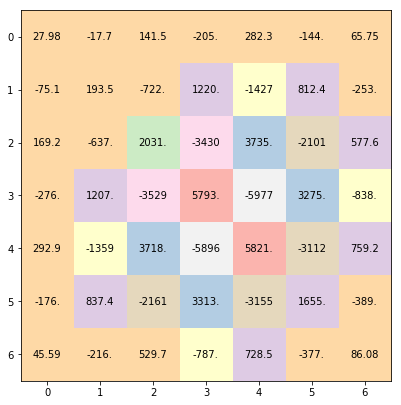

In [41]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(221)
draw_matrix(x_star.T, ax)

### Задание 3.
На основе вычисленного вектора $\large d$ построить гистограмму. По гистограмме определить компоненту $\large b_m$ вектора $\large b$, которая оказывает наибольшее влияние на погрешность решения.

The maximum influence is from element 4 from vector b.


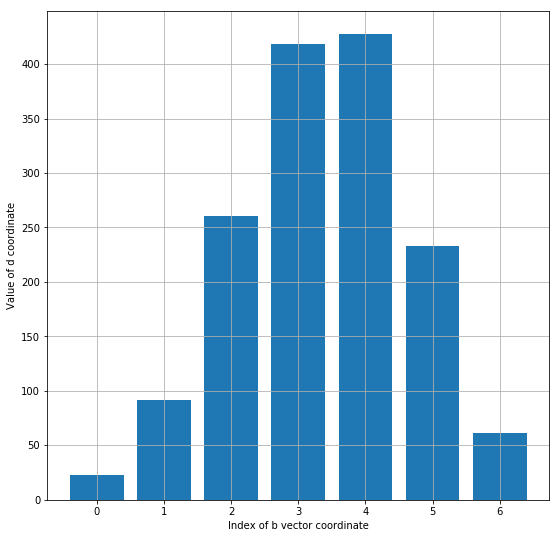

In [42]:
plt.figure(figsize=(9, 9))
plt.bar(np.arange(len(d)), d.reshape(1, -1)[0])
plt.ylabel('Value of d coordinate')
plt.xlabel('Index of b vector coordinate')
plt.grid(True)
print('The maximum influence is from element {:d} from vector b.'.format(np.argmax(d)))

### Задание 4.
Оценить теоретически погрешность решения $\large x^m$ по формуле: <br>
$\large \delta(x^m) \leq cond(A)*\delta(b^m)$. Сравнить значение $\large \delta (x^m)$ со значением практической погрешности $\large d_m$. <br> Обьяснить полученные результаты. <br>
$\large \delta(\vec{x}^*) = {\large \frac{||\vec{x} - \vec{x}^*||_\infty}{||\vec{x}||_\infty}}$ <br>


In [43]:
delta_b = lnl.norm(b - b_[np.argmax(d)].reshape(-1, 1), np.inf) / lnl.norm(b, np.inf)

x_star = lnl.solve(A, b_[np.argmax(d)].reshape(-1, 1))
delta_x = lnl.norm((x_np - x_star), np.inf) / lnl.norm(x_np, np.inf)

print('Value of delta(x^m) = {:.5f}, the inequelity: {:.5f} < {:.5f}*{:.5f} '.format(delta_x, delta_x, lnl.cond(A), delta_b),
      delta_x < lnl.cond(A)*delta_b)

Value of delta(x^m) = 119.73341, the inequelity: 119.73341 < 4333277.06293*0.00250  True


Обоснование результата: <br>
Поскольку матрица плохо обусловлена, то получаем что небольшое изменение в правой части приводит к большой погрешности в решении.